# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objective

At the end of the experiment, you will be to :

1. Understand the role of the momentum parameter
2. Observe what happens when momentum value is set to high or low
3. Different weight initialization techniques like Xavier, he

In [ ]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="800" height="300" controls>
  <source src="https://cdn.talentsprint.com/talentsprint1/archives/sc/aiml/weight_intilizations.mp4" type="video/mp4">
</video>
""")

## Dataset

### Description



The dataset used for this experiment is CIFAR-100. It  has 100 classes which contains 600 images for each class. There are 500 training images and 100 testing images per class. These 100 classes are grouped into 20 superclasses. Each image comes with the class and superclass it belongs to.

Here is the list of classes in the CIFAR-100:

| Superclass 	 | Classes|
|--------------------|-------------|
|aquatic mammals | 	beaver, dolphin, otter, seal, whale |
|fish |	aquarium fish, flatfish, ray, shark, trout |
|flowers| 	orchids, poppies, roses, sunflowers, tulips |
|food containers| 	bottles, bowls, cans, cups, plates|
|fruit and vegetables| 	apples, mushrooms, oranges, pears, sweet peppers|
|household electrical devices | clock, computer keyboard, lamp, telephone, television|
|household furniture| 	bed, chair, couch, table, wardrobe|
|insects | 	bee, beetle, butterfly, caterpillar, cockroach |
|large carnivores| 	bear, leopard, lion, tiger, wolf|
|large man-made outdoor things |	bridge, castle, house, road, skyscraper|
|large natural outdoor scenes |	cloud, forest, mountain, plain, sea|
|large omnivores and herbivores |	camel, cattle, chimpanzee, elephant, kangaroo|
|medium-sized mammals |	fox, porcupine, possum, raccoon, skunk|
|non-insect invertebrates|	crab, lobster, snail, spider, worm|
|people| 	baby, boy, girl, man, woman|
|reptiles |	crocodile, dinosaur, lizard, snake, turtle|
|small mammals| 	hamster, mouse, rabbit, shrew, squirrel |
|trees|	maple, oak, palm, pine, willow |
|vehicles 1 |	bicycle, bus, motorcycle, pickup truck, train |
|vehicles 2 |	lawn-mower, rocket, streetcar, tank, tractor |



The dataset is downloaded from following url :

https://www.cs.toronto.edu/~kriz/cifar.html

## AI / ML Technique

In this experiment you will see various initialization techniques :


*   Zero and Normal Initialization
*   Xavier Initialization
*   He-et-al Initialization


### Zero and Normal Initialization

1. If you assign all weights to be zero, then all the neurons of all the layers performs the same calculation, giving the same output and there by making whole neural net useless. 

2. If you assign all weights close to zero but randomly. This helps in breaking symmetry and every neuron is no longer performing the same computation. 

### Xavier Initialization (from the name *Xavier Glorot*)

When you intialize weights to some random values in the network, they lead to two problems :

1. If weights are assigned with very small values, then the signal or data shrinks as it passes through each layer until it's to  tiny to use.
2. If weights re assigned with too large values, then the signal or data grows as it passes through each layer until it becomes massive to use.


One good way is to assign the weights from a Gaussian distribution. Obviously this distribution would have zero mean and some finite variance. Let’s consider a linear neuron:

                                  y = w1x1 + w2x2 + ... + wNxN + b

With each passing layer, we want the variance to remain the same. **This helps us keep the signal from exploding to a high value or vanishing to zero** (Frequently asked interview question). In other words, you need to initialize the weights in such a way that the variance remains the same for x and y. This initialization process is known as Xavier initialization. 

You can read the original paper [here](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf).



### He-et-al Initialization
This method of initialization is similar to Xavier initialization, with the factor multipled by 2. The weights are initialized keeping the size of previous layer in mind. The weights are still random but differ in range depending on the size of previous layer neurons.

### Momentum


While updating weights using backpropagation after every training sample we must supply a learning rate. The learning rate controls the change in weight and bias values for each training iteration.
The equation to update weights connecting between two layers is as below :

$\Delta w_{ij} = \eta * \frac{\partial E}{\partial w_{ij}}$


If you choose very low learning rate value, the convergence is very slow. It may take hours or days. 

If you choose very high learning rate value, you would overshoot the ideal value. Due to which, in the next iteration we would undershoot the value. This would result in increase of time to train the model. 

Hence, to increase the speed up the training process you use momentum which is present in most of the models. 

The equation to update weights with momentum at given time 't' is as below:

$\Delta w_{ij} = (\eta * \frac{\partial E}{\partial w_{ij}}) + (\gamma * \Delta w_{ij}^{t-1})$


Momentum simply adds a fraction $\gamma$ of the previous weight update to the current one. 
When the gradient keeps pointing in the same direction, this will increase the size of the steps taken towards the minimum and when the gradient keeps changing direction, momentum will smooth out the variations. 



### LeNet Architecture

LeNet-5 a pioneering 7-level convolutional network by LeCun et al in 1998, that classifies digits, was applied by several banks to recognise hand-written numbers on checks (cheques) digitized in 32x32 pixel images. The ability to process higher resolution images requires larger and more convolutional layers, so this technique is constrained by the availability of computing resources.

![alt text](https://cdn-images-1.medium.com/max/800/0*MU7G1aH1jw-6eFiD.png)

In [ ]:
! wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week9/Exp6/config.py")
! wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week9/Exp6/utils.py")
  

### Importing required packages

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

# Importing config.py file
import config as cf
from utils import *

# Importing python packages
import os
import math
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Checking for GPU instance
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Intilizaing the accuracy value as zero
best_acc = 0

### Preparing the dataset

In [ ]:
print('\n[Phase 1] : Data Preparation')

# Dataset
dataset = 'cifar100'

# Preparing the dataset
transform_train = transforms.Compose([
    transforms.RandomCrop(32),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(cf.mean[dataset], cf.std[dataset]),
]) # mean and std transformation

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(cf.mean[dataset], cf.std[dataset]),
])


[Phase 1] : Data Preparation


### Downloading and Loading the dataset

The torchvision package consists of popular datasets, model architectures, and common image transformations for computer vision.


In [ ]:
# Number of classes in the dataset
num_classes = 100

In [ ]:
# Downloading the dataset
trainset = torchvision.datasets.CIFAR100(root='data', train=True, download=True, transform=transform_train)
testset = torchvision.datasets.CIFAR100(root='data', train=False, download=False, transform=transform_test)

# Loading the dataset 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=8)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=8)

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting data/cifar-100-python.tar.gz to data


### Let us define the network

In [ ]:
class LeNet(nn.Module):
    def __init__(self, num_classes, init_mode='xavier'):  # Supports 'zero', 'normal', 'xavier', 'he' initializations
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1   = nn.Linear(16*5*5, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, num_classes)
        
        if init_mode == 'zero':
            for m in self.modules():
                if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                    m.weight.data.zero_()   # Fill tensor elements with zeros
                    if m.bias is not None:
                        m.bias.data.zero_()
        
        if init_mode == 'normal':
            for m in self.modules():
                if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                    m.weight.data.normal_()   # Fill tensor elements with random numbers from normal distribution
                    if m.bias is not None:
                        m.bias.data.normal_()
        
        if init_mode == 'xavier':
            for m in self.modules():
                if isinstance(m, nn.Conv2d):
                    fan_out = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                    fan_in = m.kernel_size[0] * m.kernel_size[1] * m.in_channels
                    n = fan_in + fan_out
                    m.weight.data.normal_(0, math.sqrt(2. / n))
                    if m.bias is not None:
                        m.bias.data.normal_(0, math.sqrt(2. / n))
                if isinstance(m, nn.Linear):
                    size = m.weight.size()
                    fan_out = size[0] # Number of rows
                    fan_in = size[1] # Number of columns
                    variance = math.sqrt(2.0/(fan_in+fan_out))
                    m.weight.data.normal_(0.0, variance)
                    if m.bias is not None:
                        m.bias.data.normal_(0, variance)
        
        if init_mode == 'he':
            for m in self.modules():
                if isinstance(m, nn.Conv2d):
                    n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                    m.weight.data.normal_(0, math.sqrt(2. / n))
                    if m.bias is not None:
                        m.bias.data.normal_(0, math.sqrt(2. / n))
                if isinstance(m, nn.Linear):
                    size = m.weight.size()
                    fan_out = size[0] # Number of rows
                    fan_in = size[1] # Number of columns
                    variance = math.sqrt(2.0/(fan_in))
                    m.weight.data.normal_(0.0, variance)
                    if m.bias is not None:
                        m.bias.data.normal_(0, variance)
                
                
    # Forward Pass
    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = F.max_pool2d(out, 2)
        out = F.relu(self.conv2(out))
        out = F.max_pool2d(out, 2)
        out = out.view(out.size(0), -1)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return(out)

### Training with Xavier init

In [ ]:
# Calling the model with Xavier
net = LeNet(num_classes, init_mode='xavier')  # You rerun this entire experiment alternate values to 'xavier' (check ungraded exercise below)
# Checking for GPU instance 
net = net.to(device)

### Defining the Loss Function

In [ ]:
# Intiliazing the loss
criterion = nn.CrossEntropyLoss()

### Training the Model

In [ ]:
def train(epoch):
    print('\nEpoch: %d' % epoch)

    net.train()

    train_loss = 0
    correct = 0
    total = 0

    # Looping over train data
    for batch_idx, (inputs, targets) in enumerate(trainloader):

        # Converting inputs and targets into pytorch variables
        inputs, targets = inputs.to(device), targets.to(device)
        
        # Set the parameters of gradients to zero
        optimizer.zero_grad()

        # Forward Pass
        outputs = net(inputs)

        # Storing the outputs size
        size_ = outputs.size()

        # Reducing the dimenssion
        outputs_ = outputs.view(size_[0], num_classes)

        # Calculating the loss
        loss = criterion(outputs_, targets)

        # Backward Pass
        loss.backward()

        # Update the weights
        optimizer.step()

        # Calculating the train loss
        train_loss += loss.item()

        # Predicting the values
        _, predicted = torch.max(outputs_.data, 1)

        # Storing the targets size
        total += targets.size(0)

        # Calculating the corrected values
        correct += predicted.eq(targets.data).cpu().sum().item()

        # Printing the data
        if batch_idx % 30 == 0 or batch_idx == len(trainloader)-1:
            # Printing the progress bar
            progress_bar(batch_idx, len(trainloader), 'Loss: %.3f | Acc: %.3f%% (%d/%d)'
                         % (train_loss/(batch_idx+1), 100.*correct/total, correct, total))
            
    # Storing number of epoch, loss and accuracy in a file
    train_loss_file.write('%d %.3f %.3f\n' %(epoch, train_loss/len(trainloader), 100.*correct/total))

### Testing the Model

In [ ]:
def test(epoch):
    global best_acc
    net.eval()
    
    test_loss = 0
    correct = 0
    total = 0

    # Looping over the test data
    for batch_idx, (inputs, targets) in enumerate(testloader):

        # Coverting inputs and targets intp pytorch variables
        inputs, targets = inputs.to(device), targets.to(device)
        
        # Forward pass
        outputs = net(inputs)

        # Storing the size of outputs
        size_ = outputs.size()

        # Reducing the dimenssion
        outputs_ = outputs.view(size_[0], num_classes)

        # Calculating the loss
        loss = criterion(outputs_, targets)

        # Calculating the test loss
        test_loss += loss.item()

        # Predicted values
        _, predicted = torch.max(outputs_.data, 1)

        # Storing the size of targets
        total += targets.size(0)

        # Calculating the correct values
        correct += predicted.eq(targets.data).cpu().sum().item()
        
        # Printing the data
        if batch_idx%30 == 0 or batch_idx == len(testloader)-1:
            # printing the progress bar
            progress_bar(batch_idx, len(testloader), 'Loss: %.3f | Acc: %.3f%% (%d/%d)'
                         % (test_loss/(batch_idx+1), 100.*correct/total, correct, total))
    # Printing the validation loss 
    print('val_loss: ',  test_loss/len(testloader), 'accuracy: ', 100.0*correct/total)
    # Storing number of epoch,loss and acuracy in a file
    val_loss_file.write('%d %.3f %.3f\n' %(epoch,  test_loss/len(testloader), 100.*correct/total))

    # Save checkpoint.
    acc = 100.*correct/total

    # Checking for best accuracy
    if acc > best_acc:
        print('Saving..')
        state = {
            'net': net,
            'acc': acc,
            'epoch': epoch,
        }
        # Checking for the directory
        if not os.path.isdir('../checkpoint'):
            # Creating the directory
            os.mkdir('../checkpoint')
        # Saving the data
        torch.save(state, '../checkpoint_ckpt.t7')
        # Storing the accuracy value
        best_acc = acc

### Training without momentum

In [ ]:
experiment = 'no_momentum'
# Creating files in write mode
train_loss_file = open(experiment+"train_loss.txt", "w")
val_loss_file = open(experiment+"val_loss.txt", "w")

In [ ]:
# Optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0)

# Training and Testing the model for 30 epochs
for epoch in range(0, 30):
    # Training the model
    train(epoch)
    # Testing the model
    test(epoch)
# Closing the values   
train_loss_file.close()
val_loss_file.close()


Epoch: 0
 [==================================>] | Loss: 4.596 | Acc: 1.754% (877/50000)   391/391 
 [==================================>] | Loss: 4.544 | Acc: 2.300% (230/10000)   100/100 
val_loss:  4.543629817962646 accuracy:  2.3
Saving..

Epoch: 1
 [==================================>] | Loss: 4.476 | Acc: 2.882% (1441/50000)  391/391 
 [==================================>] | Loss: 4.398 | Acc: 3.180% (318/10000)   100/100 
val_loss:  4.398164319992065 accuracy:  3.18
Saving..

Epoch: 2
 [==================================>] | Loss: 4.315 | Acc: 4.246% (2123/50000)  391/391 
 [==================================>] | Loss: 4.216 | Acc: 5.870% (587/10000)  

#### Plotting the Training curves

30 30


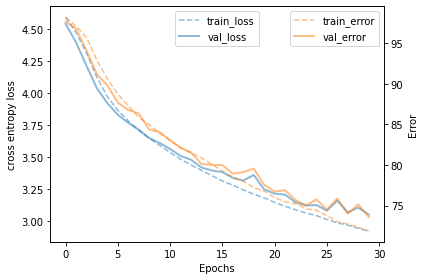

In [ ]:
training_curves(experiment)

### Training with momentum

#### Note that momentum is 0 by default in pytorch

In [ ]:
# Calling the model
net = LeNet(num_classes, init_mode='xavier')
# Checking for GPU instance
net = net.to(device)

In [ ]:
experiment = 'with_momentum'
# Cretaing files in write mode
train_loss_file = open(experiment+"train_loss.txt", "w")
val_loss_file = open(experiment+"val_loss.txt", "w")

In [ ]:
# Optimizer 
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# Training and Testing the model for 10 epochs
for epoch in range(0, 10):
    # Training the model
    train(epoch)
    # Testing the model
    test(epoch)
    
# Closing the files
train_loss_file.close()
val_loss_file.close()


Epoch: 0
 [==================================>] | Loss: 4.292 | Acc: 5.078% (2539/50000)  391/391 
 [==================================>] | Loss: 3.934 | Acc: 10.020% (1002/10000) 100/100 
val_loss:  3.9339432907104492 accuracy:  10.02

Epoch: 1
 [==================================>] | Loss: 3.726 | Acc: 12.812% (6406/50000) 391/391 
 [==================================>] | Loss: 3.594 | Acc: 15.340% (1534/10000) 100/100 
val_loss:  3.593717620372772 accuracy:  15.34

Epoch: 2
 [==================================>] | Loss: 3.474 | Acc: 17.118% (8559/50000) 391/391 
 [==================================>] | Loss: 3.415 | Acc: 18.980% (1898/10000)

#### Plotting the training curves

In [ ]:
training_curves(experiment)

### Ungraded Exercise 1 : Try with different weight initialization techniques like 'zero', 'normal' and 'he' while calling the LeNet model. 


**Note :**  When you run the code with 'normal' weight initialization and with momentum you may get NaN values. This is because random initialization, randomly samples values from a normal distribution, and hence higher the probability that some of these random values explodes the forward pass of the network. If you face this, you need to restart the runtime and rerun the experiment. (as this would ensure a new random initialiazation which should enable  the forward pass )